<a href="https://colab.research.google.com/github/EduardoMoraesRitter/CA_MU_DS_VINCE/blob/master/teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
train = pd.read_csv('https://raw.githubusercontent.com/EduardoMoraesRitter/CA_MU_DS_VINCE/master/dado_municipios%20.csv', encoding='UTF-8', error_bad_lines=False, sep=';') 

train

,Cód. IBGE,Cód. CNES,Municipio,População,Crianças (0 a 14 anos),Jovens (15 a 24 anos),Adultos (25 a 59 anos),Idosos (60 a 75+ anos),População Masculina,População Feminina,Grau de Urbanização (Em %),Abastecimento de Água,Coleta de Lixo,Esgoto Sanitário,Total Doses Aplicadas,Qtd. Estabelecimentos,Total Equip (existente),Total Equip (em uso),Total Medicos,Densidade demográfica,Mortalidade infantil,Renda\nper capta,IDHM,IDHM Longevidade,IDHM Educação,IDHM Renda,IDHM Ranking,Índice Futuridade,Grau Futuridade
0,3500105,350010,Adamantina,33894,5218,4059,17219,7398,16326,17568,"96,38","99,76","99,89","99,03",13419,140,336,284,145.0,"85,12","11,63","778,44","0,79","0,852","0,75","0,772",35,"66,5",(Alto)
1,3500204,350020,Adolfo,3447,525,458,1703,761,1707,1740,"92,52","96,76","99,72","95,93",3263,5,32,31,5.0,"16,88","19,23","588,02","0,73","0,844","0,648","0,71",388,"60,1",(Alto)
2,3500303,350030,Aguaí,35608,7075,5215,18073,5245,17889,17719,"92,21","99,29","99,66","98,87",16257,64,68,66,65.0,"76,5","16,06","540,88","0,715","0,858","0,606","0,703",502,27,(Baixo)
3,3500402,350040,Águas da Prata,7797,1174,994,3900,1729,3830,3967,"92,19","95,84","99,38","87,99",3050,4,25,25,18.0,"57,33","25,32","726,28","0,781","0,886","0,716","0,75",62,"57,2",(Médio-alto)
4,3500501,350050,Águas de Lindóia,18374,3506,2450,9143,3275,8944,9430,"99,1","93,54","98,74","90,33",8196,41,174,161,46.0,"311,1","8,37","680,22","0,745","0,846","0,675","0,725",265,"66,8",(Alto)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,3557006,355700,Votorantim,119824,23682,18194,61570,16378,59303,60521,"96,19","98,38","99,8","95,94",57667,103,683,662,68.0,"667,4","13,64","643,2","0,767","0,838","0,747","0,72",127,"35,5",(Médio)
641,3557105,355710,Votuporanga,91760,14260,11418,48879,17203,44664,47096,"97,2","99,5","99,79","98,95",59395,224,1338,1267,279.0,"224,74","8,61",808,"0,79","0,857","0,744","0,772",35,50,(Médio-alto)
642,3557154,355715,Zacarias,2560,414,351,1314,481,1271,1289,"85,27","99,06",100,"97,02",1089,3,41,36,NaN,"8,52","32,26","523,97","0,729","0,826","0,674","0,695",400,60,(Médio-alto)
643,3557204,355720,Chavantes,12223,2507,1803,5815,2098,6055,6168,"94,29",100,"99,91",98,5682,20,96,89,6.0,"65,8","5,29","586,48","0,729","0,828","0,655","0,713",400,"50,9",(Médio-alto)


In [60]:
train.isnull().sum()

Cód. IBGE                      0
Cód. CNES                      0
Municipio                      0
População                      0
Crianças (0 a 14 anos)         0
Jovens (15 a 24 anos)          0
Adultos (25 a 59 anos)         0
Idosos (60 a 75+ anos)         0
População Masculina            0
População Feminina             0
Grau de Urbanização (Em %)     0
Abastecimento de Água          0
Coleta de Lixo                 0
Esgoto Sanitário               0
 Total Doses Aplicadas         0
Qtd. Estabelecimentos          0
Total Equip (existente)        0
Total Equip (em uso)           0
Total Medicos                 28
Densidade demográfica          0
Mortalidade infantil           0
Renda\nper capta               0
IDHM                           0
IDHM Longevidade               0
IDHM Educação                  0
IDHM Renda                     0
IDHM Ranking                   0
Índice Futuridade              0
Grau Futuridade                0
dtype: int64

In [61]:
train['Total Medicos'].describe()

count      617.000000
mean       192.735818
std       1740.708049
min          1.000000
25%          4.000000
50%         13.000000
75%         57.000000
max      42030.000000
Name: Total Medicos, dtype: float64

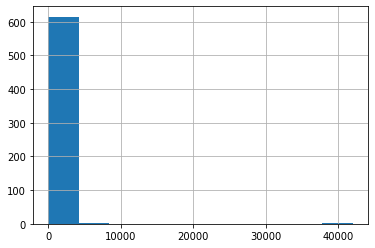

In [62]:
train['Total Medicos'].hist()

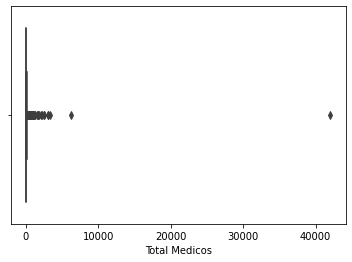

In [63]:
sns.boxplot(x = train['Total Medicos'])

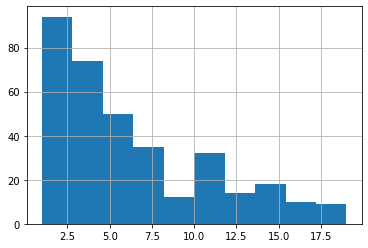

In [64]:
filter = train['Total Medicos'] < 20
train[filter]['Total Medicos'].hist()

In [0]:
train['Razao Medico Pop'] = (train['Total Medicos'] * 1000)/ train['População']

In [69]:
train['Razao Medico Pop'].describe()

count    617.000000
mean       1.316130
std        1.101992
min        0.054215
25%        0.571592
50%        0.984601
75%        1.788577
max        8.622950
Name: Razao Medico Pop, dtype: float64

In [0]:
import numpy as np
train['Razao Medico Pop'] = train['Razao Medico Pop'].replace(np.nan, train['Razao Medico Pop'].mean())

In [78]:
train['Grau Futuridade']

0            (Alto)
1            (Alto)
2           (Baixo)
3      (Médio-alto)
4            (Alto)
           ...     
640         (Médio)
641    (Médio-alto)
642    (Médio-alto)
643    (Médio-alto)
644         (Médio)
Name: Grau Futuridade, Length: 645, dtype: object